https://stepik.org/lesson/1576168/step/7

**Подвиг 5**. На рисунке в пространстве признаков $(x_1 ,x_2)$ изображены образы двух классов и проведены две разделяющие линии через точки с обозначенными координатами:

<img src='https://ucarecdn.com/90f912a3-2212-4732-9756-bdfeace47386/' width=450>

Эту задачу классификации предполагается реализовать с помощью простой двухслойной модели нейронной сети c пороговыми функциями активации:

<img src='https://ucarecdn.com/acce139c-a8ad-4915-bf36-8aeeae9f1cd4/' width=450>

Необходимо по первому рисунку вычислить (вручную) значения коэффициентов, при которых модель нейронной сети будет описывать изображенные разделяющие линии и на выходе выдавать значения +1 для одного класса образов и -1 - для другого класса образов. Вычисленные коэффициенты сохраните в тензорах:
```
W1 = torch.tensor([(w11, w12), (w21, w22)], dtype=torch.float32)
bias1 = torch.tensor([w10, w20], dtype=torch.float32)
W2 = torch.tensor([w1, w2], dtype=torch.float32)
bias2 = torch.tensor([w0], dtype=torch.float32)
```
Вычислите выходные значения для набора образов тензора `X`:
```
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)
```
Результат сохраните в одномерном тензоре **predict** длиной `batch_size`.

Замечание: в текущей версии PyTorch транспонирование матриц выполняется не с помощью свойства `t.mT`, а с помощью метода `t.transpose()` следующим образом:
```
WT = W.transpose(1,0) # меняет строки на столбцы
```
P.S. На экран ничего выводить не нужно.

In [ ]:
# @title На сдачу с готовыми весами
import torch


# тензор X в программе не менять
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)

W1 = torch.tensor([[-1.8,  1.0],
                   [-0.75,  1.0]])
bias1 = torch.tensor([-2.4, -4.5])
# Веса выходного слоя сделаем равные (равный вклад двух нейронов скрытого слоя)
W2 = torch.tensor([1.0, 1.0])
# Если оба выхода скрытого слоя нулевые, нужно сместить их сумму ниже нуля
bias2 = torch.tensor([0.5])

# Функция активации общая для всех трёх нейронов
act = lambda z: torch.where(z > 0.0, torch.ones_like(z), -torch.ones_like(z))

# Находим выход скрытого слоя
h = act(X @ W1.t() + bias1)

# Находим выход выходного слоя
predict = act(h @ W2 + bias2)
# predict

W1 = tensor([[-1.8000,  1.0000],
        [-0.7500,  1.0000]])
bias1 = tensor([-2.4000, -4.5000])
W2 = tensor([1., 1.])
bias2 = tensor([0.5000])


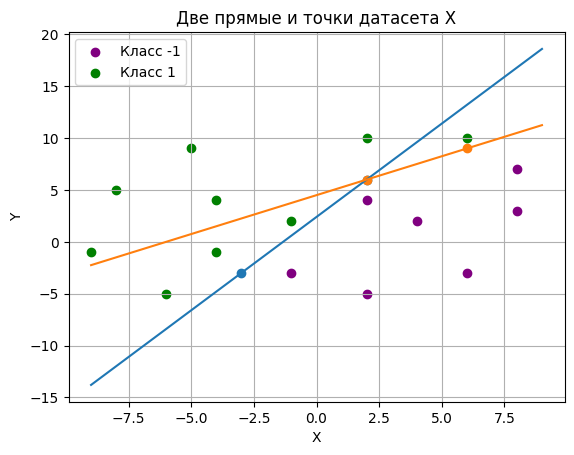

In [ ]:
# @title Тестовое решение с нахождением весов и грфиком
import torch


'''Сначала найдём веса'''
# Координаты точек на двух прямых
x1 = torch.tensor([[-3.0, -3.0], [2.0, 6.0]]) # Точки на нижней прямой
x2 = torch.tensor([[2.0, 6.0], [6.0, 9.0]])   # Точки на верхней прямой

# Формируем матрицу A и вектор b
# Фиксируем bias01 и bias02 = -2.4 и -4.5 (примерно по графику), матрица A будет содержать только w1 и w2
A = torch.stack([x1, x2])
b = torch.tensor([[2.4, 4.5], [2.4, 4.5]]).t() # Правая часть с учетом фиксированных w01 и w02

# Решаем систему уравнений для w1 и w2
solution = torch.linalg.solve(A, b)

# Извлекаааем коэффициенты из решения и вносим в матрицу весов
w1, w2 = solution
W1 = torch.stack([w1, w2])
bias1 = torch.tensor([-2.4, -4.5])

print('W1 =', W1)
print('bias1 =', bias1)

# Веса выходного слоя сделаем равные (равный вклад двух нейронов скрытого слоя)
W2 = torch.tensor([1.0, 1.0])
# Если оба выхода скрытого слоя нулевые, нужно сместить их сумму ниже нуля
bias2 = torch.tensor([0.5])
print('W2 =', W2)
print('bias2 =', bias2)

# А функция активации общая для всех трёх нейронов
act = lambda z: torch.where(z > 0.0, torch.ones_like(z), -torch.ones_like(z))

'''Тестовыые точки для построения графика'''
X = torch.FloatTensor([
    [-9, -1], [-8, 5], [-6, -5], [-5, 9], [-4, 4], [-4, -1], [-1, 2], [2, 10],
    [-1, -3], [6, 10], [2, -5], [2, 4], [4, 2], [6, -3],  [8, 7], [8, 3]])

# Находим выход скрытого слоя
h = act(X @ W1.t() + bias1)

# Находим выход выходного слоя
predict = act(h @ W2 + bias2)

'''График'''
import matplotlib.pyplot as plt

# Точки на прямых
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])

# Прямые
x1_plot = torch.linspace(-9, 9, 10)
y1_plot = - x1_plot * W1[0, 0] / W1[0, 1] - bias1[0] / W1[0, 1]
plt.plot(x1_plot, y1_plot)
x2_plot = torch.linspace(-9, 9, 10)
y2_plot = - x2_plot * W1[1, 0] / W1[1, 1] - bias1[1] / W1[1, 1]
plt.plot(x2_plot, y2_plot)

# Точки датасета X с предсказанным цветом
plt.scatter(X[predict == -1, 0], X[predict == -1, 1], color='purple', label='Класс -1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], color='green', label='Класс 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Две прямые и точки датасета X')
plt.legend()
plt.grid(True)
plt.show()

W1 = tensor([[-2.4000, -1.8000,  1.0000],
        [-4.5000, -0.7500,  1.0000]])
W2 = tensor([0.0000, 0.5000, 0.5000])


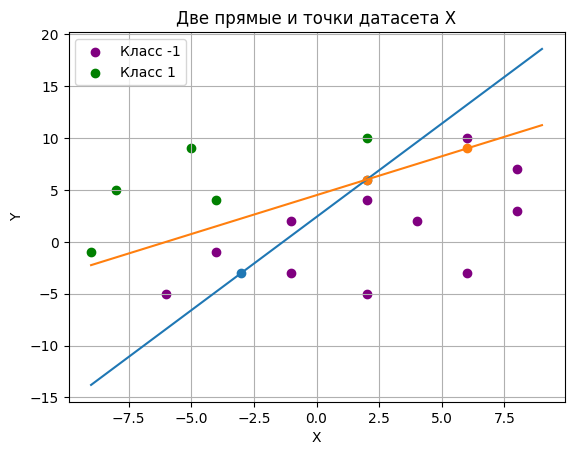

In [ ]:
# @title Без bias со столбцами из единиц
import torch


'''Сначала найдём веса'''
# Координаты точек на двух прямых
x1 = torch.tensor([[-3.0, -3.0], [2.0, 6.0]]) # Точки на нижней прямой
x2 = torch.tensor([[2.0, 6.0], [6.0, 9.0]])   # Точки на верхней прямой

# Формируем матрицу A и вектор b
# Если фиксируем w2 = 1, то матрица A будет содержать только w0 и w1
A = torch.tensor([
    [[1.0, 1.0], x1[:, 0]],  # уравнение для первой точки двух прямых
    [[1.0, 1.0], x2[:, 0]]   # уравнение для второй точки двух прямых
]).permute(2, 0, 1)
b = torch.stack([-x1[:, 1], -x2[:, 1]])  # Правая часть с учетом фиксированного w2

# Решаем систему уравнений для w0 и w1
solution = torch.linalg.solve(A, b)

# Добавляем фиксированный коэффициент w2 = 1 к решению
w0, w1 = solution.t()
w2 = torch.tensor([1.0, 1.0])
W1 = torch.stack([w0, w1, w2]).t()
print('W1 =', W1)

# Веса выходного слоя сделаем равные (равный вклад двух нейронов скрытого слоя)
W2 = torch.FloatTensor([0.0, 0.5, 0.5])
print('W2 =', W2)

# А функция активации общая для всех трёх нейронов
act = lambda z: torch.where(z > 0.0, torch.ones_like(z), -torch.ones_like(z))

'''Тестовыые точки для построения графика'''
X = torch.FloatTensor([
    [-9, -1], [-8, 5], [-6, -5], [-5, 9], [-4, 4], [-4, -1], [-1, 2], [2, 10],
    [-1, -3], [6, 10], [2, -5], [2, 4], [4, 2], [6, -3],  [8, 7], [8, 3]])

# Добавляем столбец единиц и делаем тензор X
ones = torch.ones((X.shape[0], 1), dtype=torch.float32)
X = torch.cat((ones, X), dim=1)

# Находим выход скрытоого слоя
h = act(X @ W1.t())
# Добавляем к нему столбец единиц:
h = torch.cat((torch.ones(h.shape[0], 1), h), dim=1)

predict = act(h @ W2)

'''График'''
import matplotlib.pyplot as plt

# Точки на прямых
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])

# Прямые
x1_plot = torch.linspace(-9, 9, 10)
y1_plot = - x1_plot * W1[0, 1] / W1[0, 2] - W1[0, 0] / W1[0, 2]
plt.plot(x1_plot, y1_plot)
x2_plot = torch.linspace(-9, 9, 10)
y2_plot = - x2_plot * W1[1, 1] / W1[1, 2] - W1[1, 0] / W1[1, 2]
plt.plot(x2_plot, y2_plot)

# Точки датасета X с предсказанным цветом
plt.scatter(X[predict == -1, 1], X[predict == -1, 2], color='purple', label='Класс -1')
plt.scatter(X[predict == 1, 1], X[predict == 1, 2], color='green', label='Класс 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Две прямые и точки датасета X')
plt.legend()
plt.grid(True)
plt.show()